<a href="https://colab.research.google.com/github/hayounk/paper-reading/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%matplotlib inline
from __future__ import print_function
import time
# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns #; sns.set()
import pandas as pd
import numpy as np
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division
from numpy import sqrt
from pandas import read_csv
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data

(train_digits, train_labels), (test_digits, test_labels) = load_data()

train_digits = train_digits.reshape((train_digits.shape[0], 784))

train_digits = train_digits.astype('float32')
test_digits = test_digits.astype('float32')
train_digits = train_digits / 255.0
test_digits = test_digits / 255

feat_cols = ['pixel' + str(i) for i in range(train_digits.shape[1])]
df = pd.DataFrame(train_digits, columns = feat_cols)
df['train_labels'] = train_labels
df['label'] = df['train_labels'].apply(lambda i: str(i))
train_digits, train_labels = None, None
print('Size of the dataframe: {}'.format(df.shape))


Size of the dataframe: (60000, 786)


In [15]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

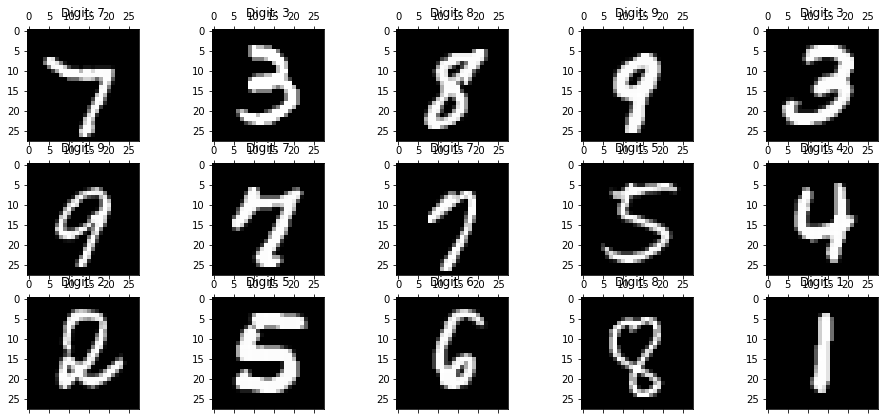

In [49]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])))
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [50]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca1'] = pca_result[:,0]
df['pca2'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0970472  0.07095959 0.06169123]


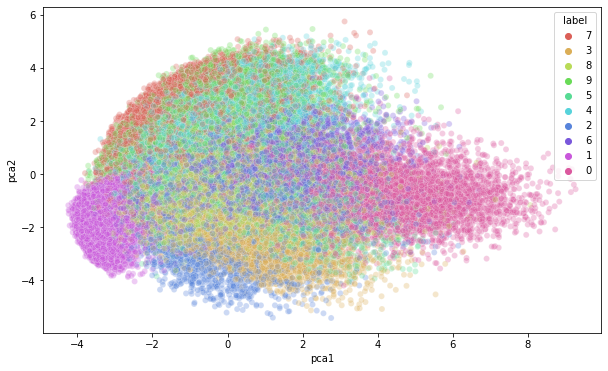

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="pca1", y="pca2",
    hue = "label",
    palette=sns.color_palette("hls",10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

#새로운거


Epoch 1/10
210/210 [==============================] - 4s 20ms/step - loss: 0.2805 - acc: 0.9108 - val_loss: 0.0683 - val_acc: 0.9784
Epoch 2/10
210/210 [==============================] - 4s 19ms/step - loss: 0.0518 - acc: 0.9835 - val_loss: 0.0449 - val_acc: 0.9863
Epoch 3/10
210/210 [==============================] - 4s 19ms/step - loss: 0.0321 - acc: 0.9897 - val_loss: 0.0475 - val_acc: 0.9866
Epoch 4/10
210/210 [==============================] - 4s 19ms/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0452 - val_acc: 0.9863
Epoch 5/10
210/210 [==============================] - 4s 19ms/step - loss: 0.0206 - acc: 0.9928 - val_loss: 0.0399 - val_acc: 0.9878
Epoch 6/10
210/210 [==============================] - 4s 19ms/step - loss: 0.0141 - acc: 0.9955 - val_loss: 0.0335 - val_acc: 0.9913
Epoch 7/10
210/210 [==============================] - 4s 19ms/step - loss: 0.0121 - acc: 0.9959 - val_loss: 0.0309 - val_acc: 0.9908
Epoch 8/10
210/210 [==============================] - 4s 19ms/step - 

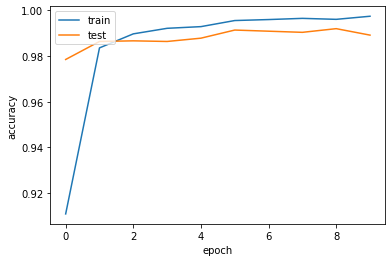

In [16]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

import os
import tensorflow as tf


(train_digits, train_labels), (test_digits, test_labels)  = mnist.load_data()

train_digits = train_digits.reshape(60000, 28, 28, 1)
test_digits = test_digits.reshape(-1, 28, 28, 1)

train_digits = train_digits.astype('float32')
test_digits = test_digits.astype('float32')
train_digits = train_digits / 255
test_digits = test_digits / 255

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

num_class = 10
train_class = to_categorical(train_labels, num_class)
test_class = to_categorical(test_labels, num_class)
train_class.shape, test_class.shape


model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

history = model.fit(train_digits,
          train_labels,
          batch_size = 200, 
          epochs = 10, 
          validation_split = 0.3)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [17]:
training_history = model.fit(
    train_digits,
    train_labels,
    epochs = 10,
    verbose=1,
    validation_data=(test_digits, test_labels),
    validation_split = 0.3
)

Epoch 1/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0521 - acc: 0.9840 - val_loss: 0.0395 - val_acc: 0.9885
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0358 - val_acc: 0.9908
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0447 - val_acc: 0.9887
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0176 - acc: 0.9946 - val_loss: 0.0350 - val_acc: 0.9913
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0133 - acc: 0.9957 - val_loss: 0.0409 - val_acc: 0.9913
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0144 - acc: 0.9954 - val_loss: 0.0390 - val_acc: 0.9913
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.0363 - val_acc: 0.9920
Epoch 8/10
1313/1313 [==============================] - 9s 7ms

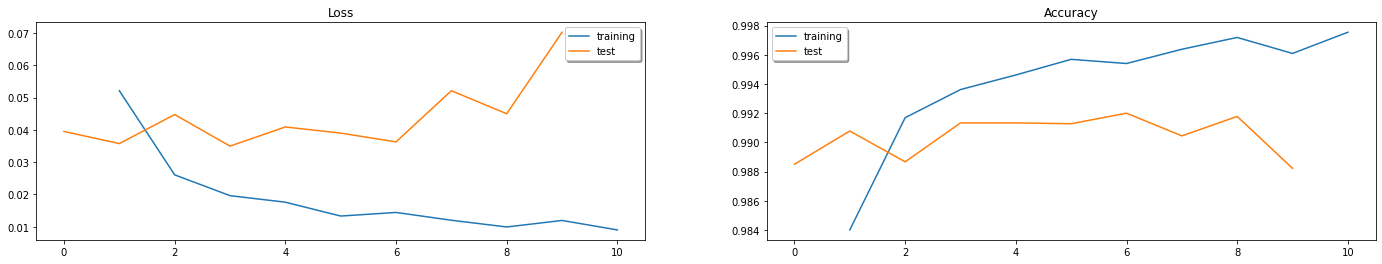

In [19]:
epochs = 10
epoch_range = [e for e in range(1, epochs + 1)]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 4))

axs[0].plot(epoch_range,
         training_history.history['loss'], 
         label = 'training'
)
axs[0].plot(
         training_history.history['val_loss'],
         label = 'test'
)
legend = axs[0].legend(loc='best', shadow=True)
axs[0].set_title('Loss')

axs[1].plot(epoch_range,
         training_history.history['acc'],
         label = 'training'
)
axs[1].plot(
         training_history.history['val_acc'],
         label = 'test'
)
legend = axs[1].legend(loc='best', shadow=True)
axs[1].set_title('Accuracy')

plt.show()

In [32]:
loss = 'xent'

# grad = tf.gradients(loss, train_digits)[0]
grad = tf.GradientTape(loss, train_digits)
grad

#CIFAR-10


In [6]:
#imports couple of libraries and check version of tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

cifar10 = tf.keras.datasets.cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


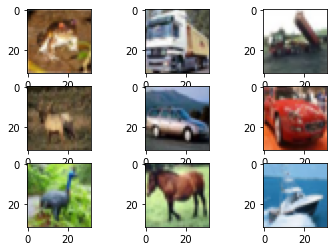

In [8]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
cifar10 = tf.keras.datasets.cifar10.load_data()

(trainX, trainy), (testX, testy) = cifar10

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot 9 images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

# 실험


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 872,714
Trainable params: 872,714
Non-trainable params: 0
________________________________________________

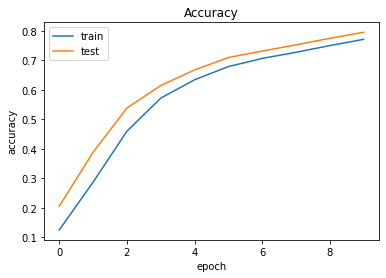

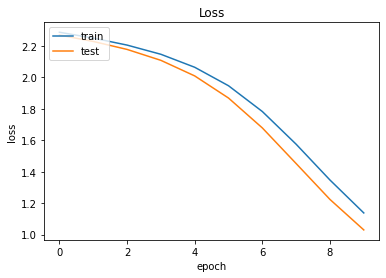

In [4]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

import os
import tensorflow as tf

# get MNIST dataset
(train_digits, train_labels), (test_digits, test_labels)  = mnist.load_data()

train_digits = train_digits.reshape(60000, 28, 28, 1)
test_digits = test_digits.reshape(-1, 28, 28, 1)

train_digits = train_digits.astype('float32')
test_digits = test_digits.astype('float32')
train_digits = train_digits / 255
test_digits = test_digits / 255

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

num_class = 10
train_class = to_categorical(train_labels, num_class)
test_class = to_categorical(test_labels, num_class)
train_class.shape, test_class.shape

# building CNN model
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(5, 5), 
          activation='relu', 
          input_shape=(28, 28, 1)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adadelta',
              metrics = ['acc'])

# print(model.summary())

history = model.fit(train_digits,
          train_labels,
          batch_size = 200, 
          epochs = 10, 
          validation_split = 0.3)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()